In [3]:
from google.colab import drive
import os
drive.mount('/content/drive')
data_dir = '/content/drive/My Drive/CH Counts Data'

Mounted at /content/drive


In [5]:
import pandas as pd
master_file_path = "/content/drive/MyDrive/Balanced_Data_2000.csv"

master_df = pd.read_csv(master_file_path)
print(master_df["Mineral Phase"].value_counts())

Fe-Oxide            2000
Tourmaline          2000
Fe-Sulphide_Cu      2000
Al-Silicate         2000
Al-Oxide            2000
Nb-bearing phase    2000
Celestine           2000
Barite              2000
Mn-Oxide            2000
Carbonate           2000
Columbite_Mn        2000
Quartz              2000
REE-Silicate        2000
W-Oxide             2000
Cassiterite         2000
Chromite            2000
Thorite             2000
Fe-sulphide_Pb      2000
Cu-Oxide            2000
Molybdenite         2000
Background          2000
Xenotime            2000
Zircon              2000
Titanite            2000
Ilmenite            2000
Epidote             2000
Amphibole           2000
AlFe-Silicate       2000
Fe-Silicate         2000
Rutile              2000
Unknown             2000
Zn-Oxide            2000
Leucoxene           2000
AlMn-Silicate       2000
Monazite            2000
AlK-Silicate        2000
Fe-Sulphide         2000
AlCa-Silicate       2000
Apatite             2000
RM ONLY             2000


In [6]:
from sklearn.model_selection import train_test_split

X = master_df.iloc[:,:-1]
y = master_df.iloc[:,-1].astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10 , random_state=8)

del(master_df)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier(n_estimators = 500)


param_grid = {
    'max_depth': [10,20,30,35,40],
    'min_samples_split': [2, 5, 6, 7, 10],
    'min_samples_leaf': [1, 2, 4, 5, 6, 10],
    'bootstrap': [True]
}



grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, scoring='f1_micro')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the model
f1 = grid_search.best_score_
print("Best Cross Validation Score: {:.2f}".format(f1))

In [7]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators= 200, max_depth = 37, min_samples_leaf = 2, min_samples_split = 5, bootstrap = False)


random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=37, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200)

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict the labels for the test set
y_pred = random_forest.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.9143389199255121
Precision: 0.9144728153051416
Recall: 0.9143389199255121
F1 Score: 0.9127233540466092


[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    1.8s
Accuracy: 0.9167830540037244
Precision: 0.9173478683991095
Recall: 0.9167830540037244
F1 Score: 0.9152719850898972

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

                  precision    recall  f1-score   support

        Al-Oxide       0.83      0.94      0.88       203
     Al-Silicate       0.92      0.97      0.94       193
   AlCa-Silicate       0.85      0.99      0.91       172
   AlFe-Silicate       0.81      0.56      0.66       210
AlFe-Silicate_Zn       0.80      0.95      0.87       187
    AlK-Silicate       0.87      0.90      0.89       172
   AlMn-Silicate       0.87      0.87      0.87       219
       Amphibole       0.76      0.76      0.76       194
         Apatite       0.98      1.00      0.99       195
      Background       0.88      0.86      0.87       204
          Barite       0.91      0.97      0.94       225
       Carbonate       1.00      0.99      0.99       207
     Cassiterite       0.98      0.98      0.98       180
       Celestine       0.99      1.00      1.00       213
        Chromite       0.99      0.93      0.96       233
        Cinnabar       1.00      1.00      1.00       211
    Columbite

In [9]:
#Create a Sequence of File Numbers
train_file_numbers = range(1,8328)
train_file_names = [os.path.join(data_dir, f"Group8_{str(i).zfill(4)}.csv") for i in train_file_numbers]

The classification report for /content/drive/My Drive/CH Counts Data/Group8_1825.csv (1):
                  precision    recall  f1-score   support

     Al-Silicate       0.25      1.00      0.40         2
   AlFe-Silicate       0.57      0.29      0.38       629
    AlK-Silicate       0.46      0.95      0.62       176
   AlMn-Silicate       0.89      0.87      0.88        83
      Background       0.99      0.78      0.87      1376
     Cassiterite       0.87      0.95      0.91       113
        Chromite       0.50      1.00      0.67         2
        Fe-Oxide       0.99      0.87      0.93      4330
     Fe-Silicate       0.58      0.93      0.71       698
        Ilmenite       0.64      0.93      0.76       175
       Leucoxene       0.00      1.00      0.00         0
      MgAl-Oxide       0.00      1.00      0.00         0
        Mn-Oxide       0.43      1.00      0.60         3
        Monazite       0.50      0.22      0.31         9
Nb-bearing phase       0.00      1.00  

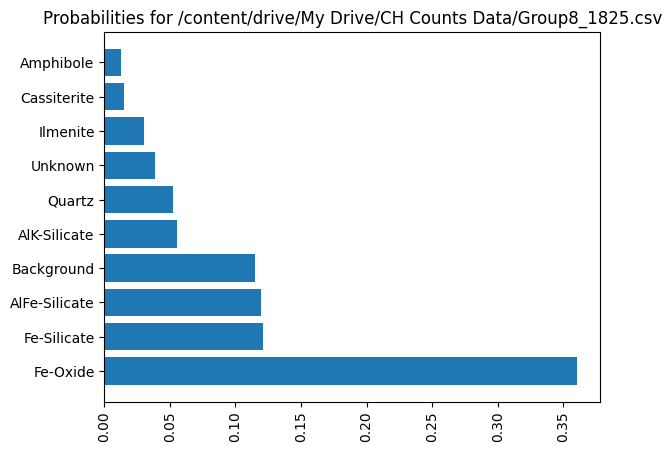

The classification report for /content/drive/My Drive/CH Counts Data/Group8_0410.csv (2):
                  precision    recall  f1-score   support

        Al-Oxide       0.01      1.00      0.02         1
     Al-Silicate       0.22      0.97      0.36        36
   AlCa-Silicate       0.41      1.00      0.58        20
   AlFe-Silicate       0.80      0.76      0.78      1524
AlFe-Silicate_Zn       0.25      1.00      0.40         2
    AlK-Silicate       0.33      0.96      0.49       152
   AlMn-Silicate       0.83      0.91      0.87        11
       Amphibole       0.40      0.24      0.30        49
         Apatite       0.75      0.99      0.85        68
      Background       1.00      0.76      0.86      3543
     Cassiterite       0.76      0.99      0.86       568
        Chromite       1.00      0.00      0.00         3
         Epidote       0.88      0.53      0.66        80
        Fe-Oxide       0.95      0.59      0.73       528
     Fe-Silicate       0.56      0.89  

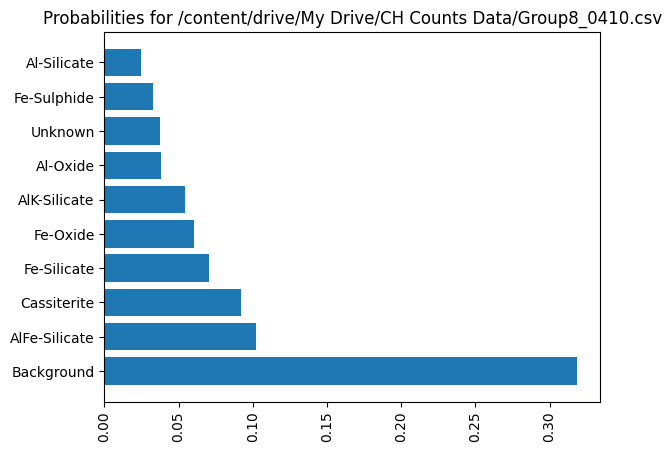

The classification report for /content/drive/My Drive/CH Counts Data/Group8_4507.csv (3):
                  precision    recall  f1-score   support

        Al-Oxide       0.12      1.00      0.21         3
     Al-Silicate       0.63      0.91      0.74        32
   AlCa-Silicate       1.00      1.00      1.00         1
   AlFe-Silicate       0.77      0.50      0.61       227
   AlMn-Silicate       0.93      0.68      0.78        56
       Amphibole       1.00      0.78      0.88         9
      Background       0.87      0.94      0.90       303
         Epidote       1.00      0.91      0.95        11
        Fe-Oxide       0.99      0.98      0.98      6163
     Fe-Silicate       0.57      0.91      0.70        34
        Ilmenite       0.96      0.88      0.92       488
       Leucoxene       0.40      1.00      0.57        36
        Mn-Oxide       0.00      1.00      0.00         0
        Monazite       1.00      0.00      0.00         2
Nb-bearing phase       0.36      1.00  

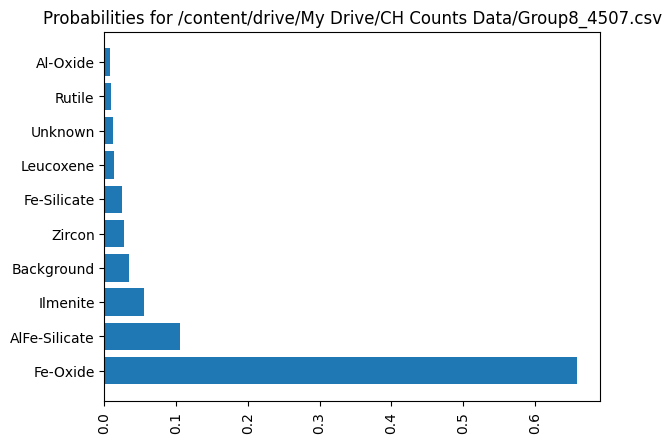

The classification report for /content/drive/My Drive/CH Counts Data/Group8_4013.csv (4):
                  precision    recall  f1-score   support

        Al-Oxide       0.04      1.00      0.07         1
     Al-Silicate       0.83      1.00      0.91         5
   AlFe-Silicate       0.82      0.56      0.67       420
AlFe-Silicate_Zn       0.04      1.00      0.08         1
    AlK-Silicate       0.20      0.67      0.31         3
   AlMn-Silicate       0.94      0.85      0.89       227
       Amphibole       0.76      0.83      0.79        23
      Background       0.95      0.91      0.93       336
    Columbite_Mn       0.90      0.90      0.90        21
        Fe-Oxide       0.97      0.93      0.95      3390
     Fe-Silicate       0.56      0.93      0.70       148
        Ilmenite       0.96      0.92      0.94      2627
       Leucoxene       0.46      0.99      0.63       127
      MgAl-Oxide       0.00      1.00      0.00         0
        Mn-Oxide       0.00      1.00  

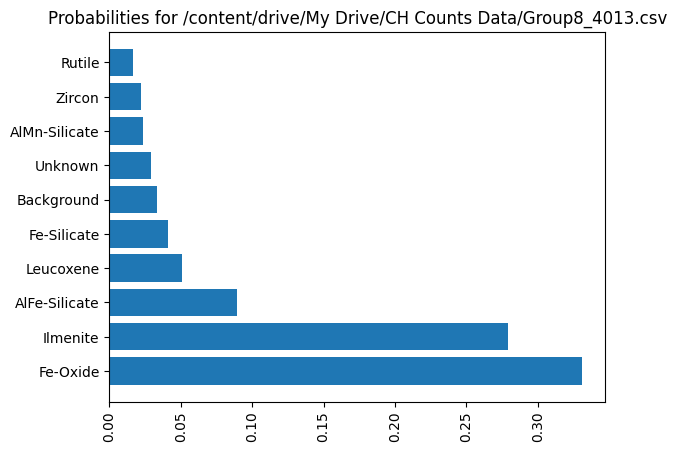

The classification report for /content/drive/My Drive/CH Counts Data/Group8_3658.csv (5):
                  precision    recall  f1-score   support

   AlFe-Silicate       0.39      0.19      0.25       291
AlFe-Silicate_Zn       0.00      1.00      0.00         0
    AlK-Silicate       0.50      1.00      0.67         1
      Background       0.97      0.92      0.94       900
          Barite       0.79      1.00      0.88       420
        Fe-Oxide       0.96      0.96      0.96      5853
     Fe-Silicate       0.61      0.96      0.75       197
     Fe-Sulphide       0.00      1.00      0.00         0
        Ilmenite       0.89      0.36      0.51        45
       Leucoxene       0.25      1.00      0.40         1
        Monazite       0.00      0.00      0.00         8
          Quartz       0.43      1.00      0.60         3
          Rutile       0.80      1.00      0.89        20
         Unknown       0.11      0.40      0.17         5
          Zircon       0.89      0.99  

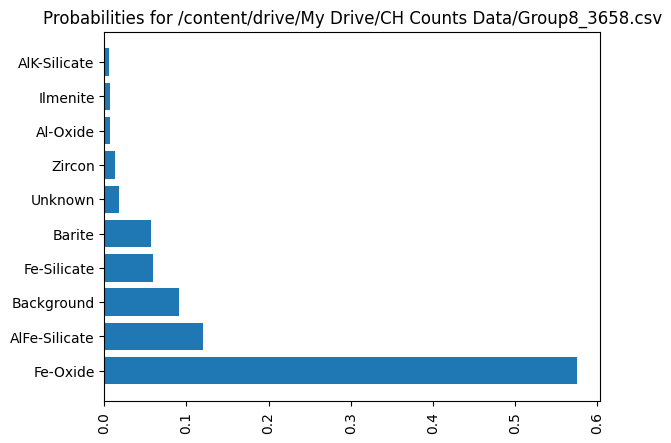

The classification report for /content/drive/My Drive/CH Counts Data/Group8_2287.csv (6):
               precision    recall  f1-score   support

     Al-Oxide       0.00      1.00      0.00         0
AlFe-Silicate       0.42      0.17      0.25       511
 AlK-Silicate       0.00      1.00      0.00         0
AlMn-Silicate       0.97      0.88      0.92       137
   Background       0.96      0.95      0.95       710
     Fe-Oxide       0.95      0.92      0.94      5630
  Fe-Silicate       0.54      0.96      0.69       628
     Ilmenite       1.00      0.90      0.95        21
    Leucoxene       0.50      1.00      0.67         1
     Mn-Oxide       0.00      0.00      0.00         1
     Monazite       1.00      0.67      0.80         6
       Quartz       0.33      1.00      0.50         2
 REE-Silicate       0.00      1.00      0.00         0
       Rutile       1.00      1.00      1.00         9
      Unknown       0.00      1.00      0.00         0

     accuracy               

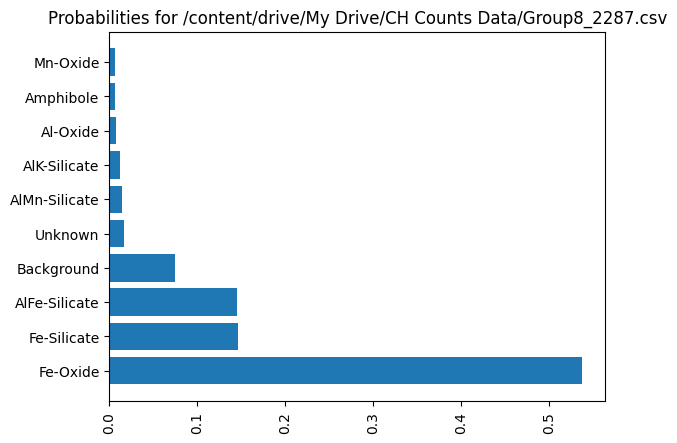

The classification report for /content/drive/My Drive/CH Counts Data/Group8_1680.csv (7):
               precision    recall  f1-score   support

     Al-Oxide       0.00      1.00      0.00         0
  Al-Silicate       0.82      1.00      0.90         9
AlCa-Silicate       0.05      1.00      0.09         2
AlFe-Silicate       0.82      0.91      0.86      1159
 AlK-Silicate       0.35      1.00      0.52         6
AlMn-Silicate       0.54      0.82      0.65       107
    Amphibole       0.86      0.92      0.89       622
   Background       0.97      0.87      0.92       547
      Epidote       0.91      0.68      0.78       330
     Fe-Oxide       0.99      0.79      0.88      2296
  Fe-Silicate       0.58      0.85      0.69        26
     Ilmenite       0.95      0.96      0.96      2742
    Leucoxene       0.50      1.00      0.67         1
     Mn-Oxide       0.00      1.00      0.00         0
     Monazite       0.89      1.00      0.94         8
       Quartz       0.33     

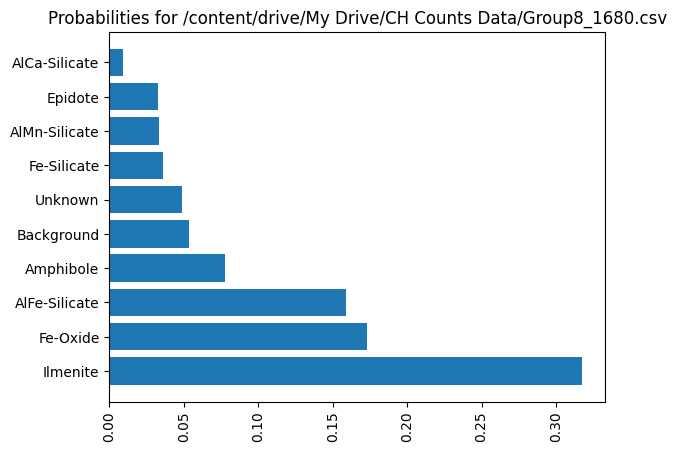

The classification report for /content/drive/My Drive/CH Counts Data/Group8_1425.csv (8):
                  precision    recall  f1-score   support

        Al-Oxide       0.13      0.78      0.22         9
     Al-Silicate       0.37      0.96      0.53       535
   AlCa-Silicate       0.05      1.00      0.09         4
   AlFe-Silicate       0.65      0.21      0.32       214
    AlK-Silicate       0.49      0.90      0.64       809
       Amphibole       0.64      0.40      0.49       320
         Apatite       0.75      1.00      0.86        52
      Background       1.00      0.55      0.71      3653
       Carbonate       0.00      1.00      0.00         0
         Epidote       0.90      0.79      0.84       638
        Fe-Oxide       0.95      0.87      0.91       380
     Fe-Silicate       0.67      0.84      0.75       156
        Ilmenite       0.95      0.49      0.65       159
       Leucoxene       0.39      1.00      0.56        20
        Mn-Oxide       1.00      0.00  

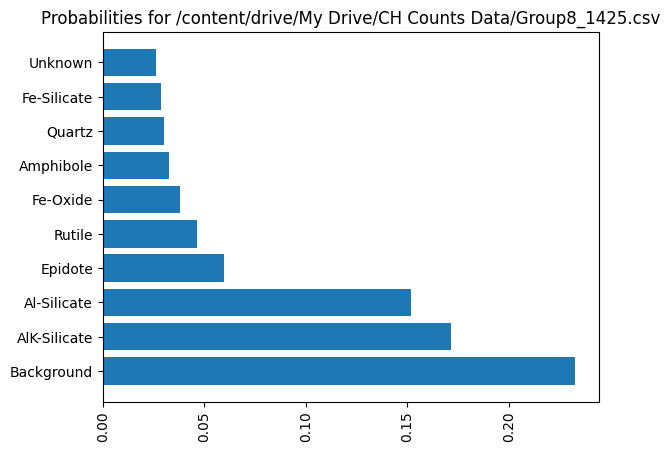

The classification report for /content/drive/My Drive/CH Counts Data/Group8_6913.csv (9):
                  precision    recall  f1-score   support

        Al-Oxide       0.00      0.00      0.00         7
     Al-Silicate       0.72      0.95      0.82        40
   AlCa-Silicate       0.33      1.00      0.50         1
   AlFe-Silicate       0.60      0.48      0.53       191
AlFe-Silicate_Zn       0.21      0.83      0.33        30
    AlK-Silicate       0.53      0.91      0.67        45
   AlMn-Silicate       0.25      0.33      0.29         3
       Amphibole       0.85      0.75      0.80       491
         Apatite       0.25      1.00      0.40         1
      Background       0.88      0.96      0.92       588
          Barite       1.00      0.00      0.00         1
        Chromite       1.00      0.00      0.00        14
         Epidote       0.92      0.36      0.52        92
        Fe-Oxide       0.97      0.68      0.80      1012
     Fe-Silicate       0.49      0.73  

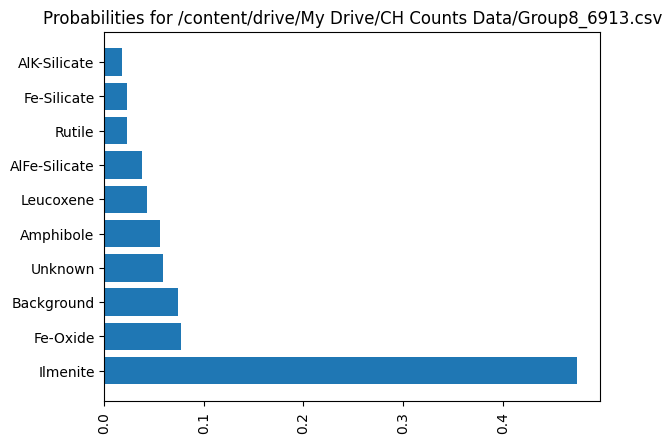

The classification report for /content/drive/My Drive/CH Counts Data/Group8_0521.csv (10):
               precision    recall  f1-score   support

            0       1.00      0.00      0.00         1
     Al-Oxide       0.29      1.00      0.44         2
  Al-Silicate       0.17      1.00      0.29       499
AlFe-Silicate       1.00      0.00      0.00         5
 AlK-Silicate       0.18      1.00      0.31        24
   Background       1.00      0.50      0.66      5963
  Cassiterite       0.69      0.99      0.81       859
      Epidote       1.00      0.00      0.00         1
     Fe-Oxide       1.00      1.00      1.00         9
     Ilmenite       1.00      0.00      0.00         1
    Leucoxene       0.00      1.00      0.00         0
     Monazite       0.75      1.00      0.86        73
       Quartz       0.44      1.00      0.62        24
       Rutile       1.00      1.00      1.00         2
      Thorite       1.00      1.00      1.00        13
   Tourmaline       0.00    

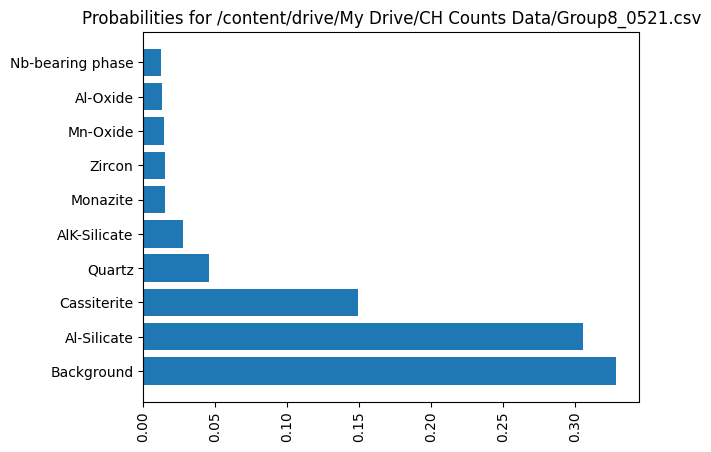

The classification report for /content/drive/My Drive/CH Counts Data/Group8_0489.csv (11):
                  precision    recall  f1-score   support

        Al-Oxide       0.00      1.00      0.00         0
     Al-Silicate       0.43      0.97      0.60        61
   AlCa-Silicate       0.07      1.00      0.13         1
   AlFe-Silicate       0.92      0.84      0.88      1629
AlFe-Silicate_Zn       0.41      0.90      0.57        21
    AlK-Silicate       0.49      0.86      0.63        37
   AlMn-Silicate       0.50      0.84      0.62       264
       Amphibole       0.75      0.74      0.74       122
         Apatite       0.85      1.00      0.92       136
      Background       0.98      0.75      0.85       859
          Barite       0.00      1.00      0.00         0
        Chromite       0.96      0.97      0.96       187
         Epidote       0.79      0.22      0.35        49
        Fe-Oxide       0.98      0.73      0.84      1331
     Fe-Silicate       0.21      0.75 

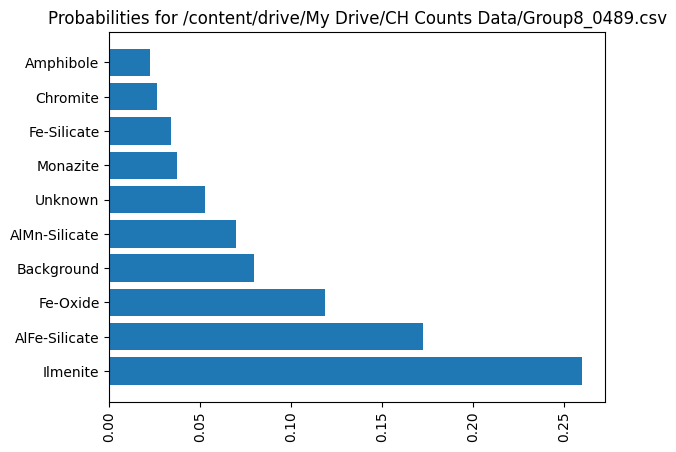

The classification report for /content/drive/My Drive/CH Counts Data/Group8_1536.csv (12):
               precision    recall  f1-score   support

     Al-Oxide       0.00      1.00      0.00         0
  Al-Silicate       0.38      1.00      0.55        17
AlCa-Silicate       0.26      0.87      0.40        39
AlFe-Silicate       0.59      0.21      0.31       188
 AlK-Silicate       0.36      0.96      0.53        49
AlMn-Silicate       1.00      0.91      0.95        32
    Amphibole       0.83      0.78      0.80       633
   Background       0.97      0.81      0.88       690
      Epidote       0.95      0.91      0.93      1424
     Fe-Oxide       0.98      0.97      0.97      3770
  Fe-Silicate       0.69      0.83      0.75       179
     Ilmenite       0.94      0.87      0.90       395
    Leucoxene       0.36      1.00      0.53        22
     Mn-Oxide       0.00      1.00      0.00         0
       Quartz       0.54      1.00      0.70        45
       Rutile       0.75    

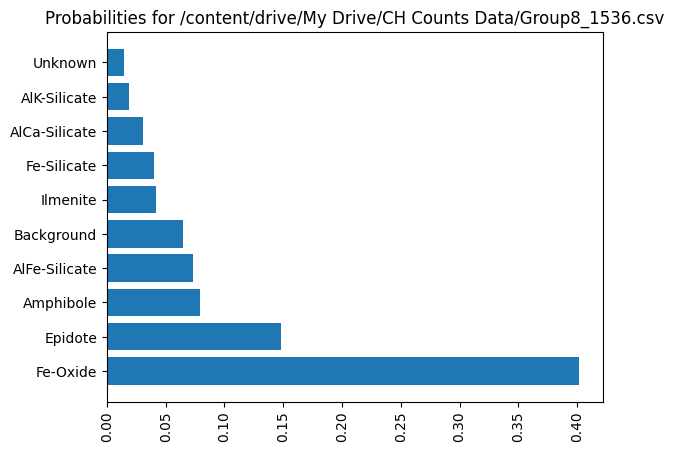

The classification report for /content/drive/My Drive/CH Counts Data/Group8_3583.csv (13):
                  precision    recall  f1-score   support

        Al-Oxide       0.00      1.00      0.00         0
     Al-Silicate       0.49      0.96      0.65        49
   AlFe-Silicate       0.42      0.36      0.39       529
AlFe-Silicate_Zn       0.20      1.00      0.33         1
    AlK-Silicate       0.00      1.00      0.00         0
   AlMn-Silicate       0.96      0.88      0.92        51
       Amphibole       1.00      0.00      0.00         2
      Background       1.00      0.82      0.90       951
          Barite       0.61      1.00      0.76        14
        Fe-Oxide       0.97      0.88      0.92      4693
     Fe-Silicate       0.63      0.98      0.77      1066
        Ilmenite       0.91      0.86      0.88       194
       Leucoxene       0.48      1.00      0.65        15
      MgAl-Oxide       0.00      1.00      0.00         0
        Mn-Oxide       0.00      1.00 

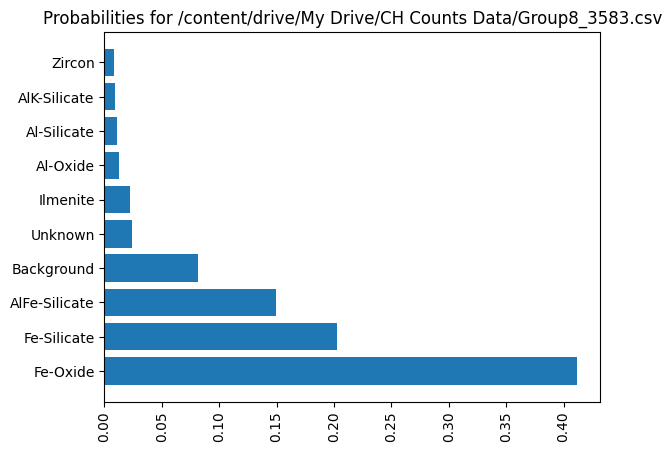

The classification report for /content/drive/My Drive/CH Counts Data/Group8_3812.csv (14):
               precision    recall  f1-score   support

AlFe-Silicate       0.22      0.02      0.04       177
 AlK-Silicate       0.00      1.00      0.00         0
   Background       0.86      0.99      0.92       383
     Fe-Oxide       0.98      0.99      0.98      6760
  Fe-Silicate       0.75      0.96      0.84        45
     Ilmenite       0.83      0.91      0.87        11
    Leucoxene       0.33      1.00      0.50         1
   MgAl-Oxide       0.00      1.00      0.00         0
       Quartz       0.43      1.00      0.60         3
       Rutile       1.00      0.96      0.98        23
      Unknown       0.00      1.00      0.00         0
       Zircon       0.95      1.00      0.97       165

     accuracy                           0.96      7568
    macro avg       0.53      0.90      0.56      7568
 weighted avg       0.95      0.96      0.95      7568

0.8436965708989961 0.90602

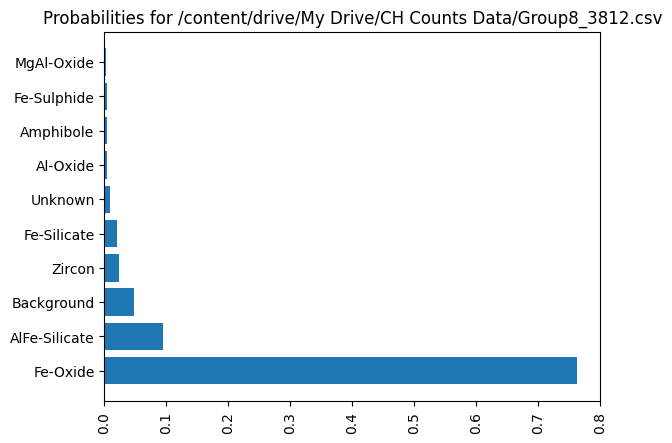

The classification report for /content/drive/My Drive/CH Counts Data/Group8_8280.csv (15):
                  precision    recall  f1-score   support

        Al-Oxide       0.39      0.99      0.56        72
     Al-Silicate       0.49      0.93      0.64       102
   AlCa-Silicate       0.50      0.95      0.65       131
   AlFe-Silicate       0.87      0.65      0.74       166
AlFe-Silicate_Zn       0.28      0.71      0.40        17
    AlK-Silicate       0.38      1.00      0.56        65
   AlMn-Silicate       1.00      0.34      0.50       128
       Amphibole       0.73      0.37      0.49       134
         Apatite       0.81      1.00      0.89        29
      Background       0.98      0.90      0.94      7314
          Barite       0.67      0.91      0.77        92
       Carbonate       0.89      0.99      0.94       199
     Cassiterite       0.83      0.99      0.90       136
       Celestine       0.91      1.00      0.96        32
        Chromite       0.96      0.87 

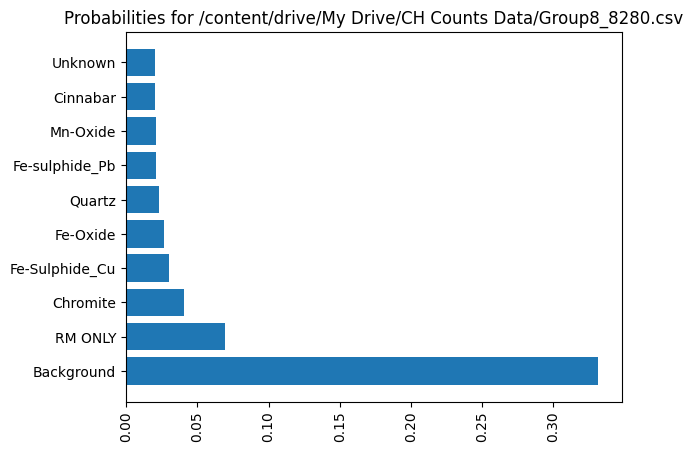

The classification report for /content/drive/My Drive/CH Counts Data/Group8_0435.csv (16):
               precision    recall  f1-score   support

AlCa-Silicate       0.09      1.00      0.16        15
AlFe-Silicate       0.77      0.34      0.47       518
 AlK-Silicate       0.22      0.98      0.36       122
AlMn-Silicate       0.63      0.93      0.75       126
    Amphibole       0.75      0.83      0.79      1182
   Background       1.00      0.74      0.85       991
    Celestine       0.00      1.00      0.00         0
      Epidote       0.88      0.80      0.84      1540
     Fe-Oxide       0.99      0.74      0.85      2193
  Fe-Silicate       0.40      0.82      0.54       279
     Ilmenite       0.83      0.73      0.78       149
    Leucoxene       0.20      1.00      0.33         3
   MgAl-Oxide       0.00      1.00      0.00         0
     Mn-Oxide       0.00      1.00      0.00         0
     Monazite       0.50      0.67      0.57         3
       Quartz       0.27    

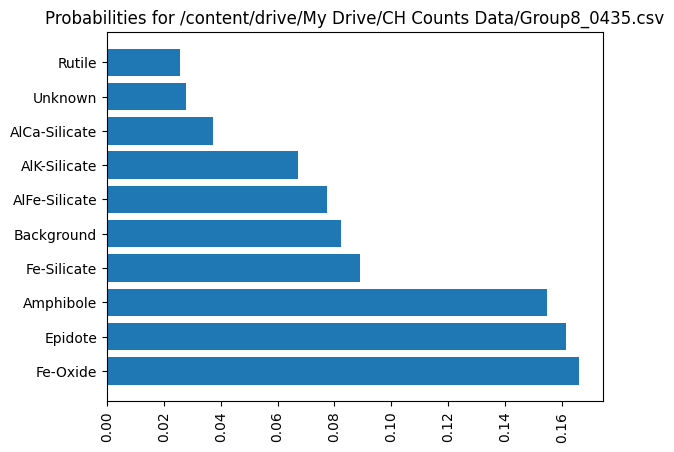

The classification report for /content/drive/My Drive/CH Counts Data/Group8_3258.csv (17):
                  precision    recall  f1-score   support

        Al-Oxide       0.00      1.00      0.00         0
   AlCa-Silicate       0.00      1.00      0.00         0
   AlFe-Silicate       0.36      0.09      0.14       257
    AlK-Silicate       0.34      0.89      0.49       273
       Amphibole       0.63      0.71      0.67       590
      Background       1.00      0.55      0.71      1877
          Barite       0.00      1.00      0.00         0
     Cassiterite       1.00      1.00      1.00         7
        Chromite       1.00      0.00      0.00         1
         Epidote       0.89      0.43      0.58       984
        Fe-Oxide       0.98      0.81      0.89      1537
     Fe-Silicate       0.38      0.73      0.50       130
     Fe-Sulphide       0.75      1.00      0.86         6
        Ilmenite       0.85      0.45      0.59       467
       Leucoxene       0.05      1.00 

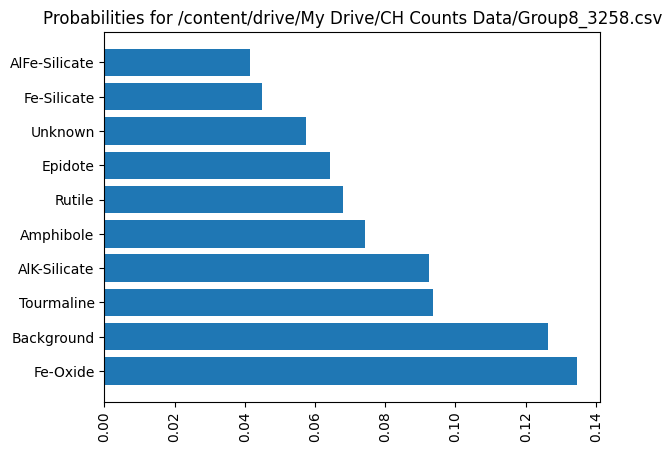

The classification report for /content/drive/My Drive/CH Counts Data/Group8_6874.csv (18):
                  precision    recall  f1-score   support

        Al-Oxide       0.00      1.00      0.00         0
     Al-Silicate       1.00      0.67      0.80         3
   AlCa-Silicate       0.00      1.00      0.00         0
   AlFe-Silicate       0.67      0.51      0.58       133
AlFe-Silicate_Zn       0.08      1.00      0.15         1
    AlK-Silicate       0.36      1.00      0.53         4
   AlMn-Silicate       0.17      0.40      0.24         5
       Amphibole       0.86      0.75      0.80      1216
         Apatite       0.50      1.00      0.67         4
      Background       0.97      0.97      0.97      1973
         Epidote       0.89      0.46      0.60       258
        Fe-Oxide       0.97      0.71      0.82       962
     Fe-Silicate       0.38      0.88      0.53        49
        Ilmenite       0.92      0.94      0.93      2525
       Leucoxene       0.35      1.00 

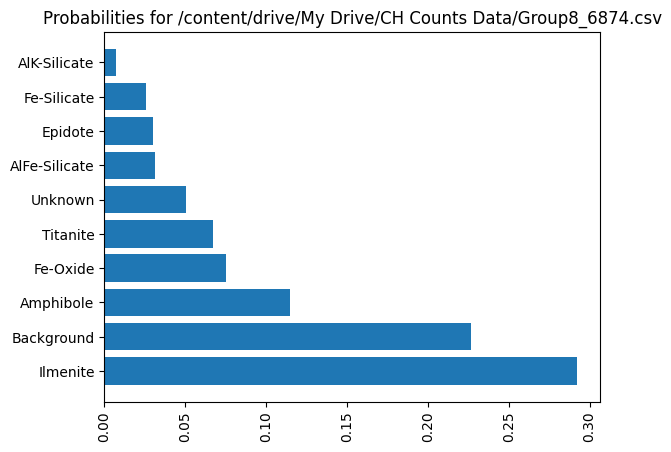

The classification report for /content/drive/My Drive/CH Counts Data/Group8_3612.csv (19):
                  precision    recall  f1-score   support

        Al-Oxide       0.10      1.00      0.18         8
     Al-Silicate       0.57      0.96      0.72       180
   AlFe-Silicate       0.63      0.47      0.53       460
AlFe-Silicate_Zn       0.00      1.00      0.00         0
      Background       0.99      0.74      0.85       779
          Barite       0.67      1.00      0.80        16
       Celestine       0.67      1.00      0.80         6
        Fe-Oxide       0.98      0.95      0.97      5314
     Fe-Silicate       0.67      0.97      0.79       502
     Fe-Sulphide       0.00      1.00      0.00         0
        Ilmenite       0.92      0.84      0.87        91
       Leucoxene       0.41      1.00      0.58         9
        Mn-Oxide       1.00      0.00      0.00         1
        Monazite       0.25      1.00      0.40         1
          Quartz       0.79      1.00 

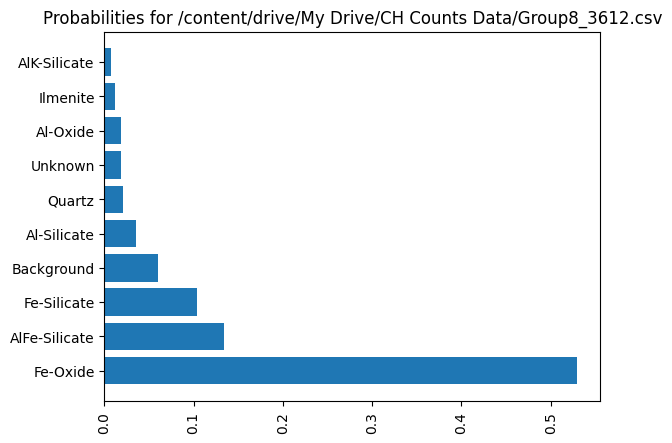

The classification report for /content/drive/My Drive/CH Counts Data/Group8_7360.csv (20):
                  precision    recall  f1-score   support

        Al-Oxide       0.00      1.00      0.00         0
     Al-Silicate       0.77      1.00      0.87        24
   AlCa-Silicate       0.43      0.73      0.54        22
   AlFe-Silicate       0.80      0.75      0.77      1286
AlFe-Silicate_Zn       0.00      1.00      0.00         0
    AlK-Silicate       0.39      0.78      0.52         9
   AlMn-Silicate       0.81      0.95      0.87       932
       Amphibole       0.76      0.64      0.69       612
         Apatite       0.50      1.00      0.67         1
      Background       0.87      0.96      0.91       723
        Chromite       1.00      0.90      0.95        10
         Epidote       0.95      0.80      0.86       757
        Fe-Oxide       0.96      0.73      0.83      1873
     Fe-Silicate       0.69      0.86      0.76       443
     Fe-Sulphide       0.75      1.00 

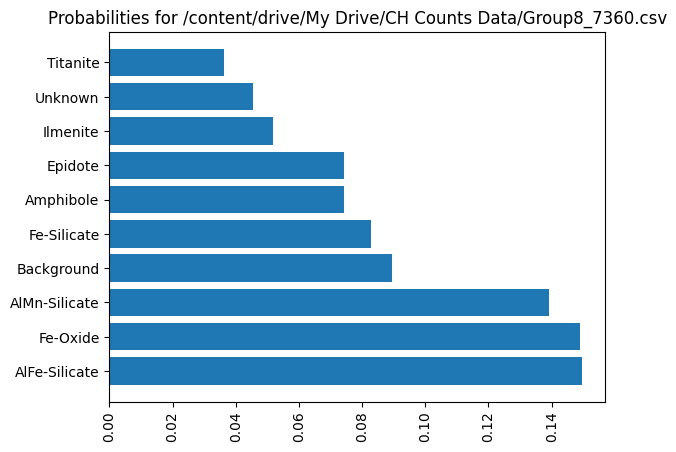

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import warnings
from sklearn.exceptions import UndefinedMetricWarning
import matplotlib.pyplot as plt
import pandas as pd



import random
random.seed(42)

selected_file_names = random.sample(train_file_names, 20)


accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
count = 0

for name in selected_file_names:
    count += 1
    # Read the current CSV file
    df = pd.read_csv(name)
    df = df.fillna(0)
    df["Mineral Phase"] = df["Mineral Phase"].astype(str)
    n_col = len(df.columns)
    df = df.drop(df.iloc[:, 2800:(n_col-2)], axis=1)
    df = df.drop(df.iloc[:, :126], axis=1)
    X_test = df.iloc[:,:-1]
    y_test = df.iloc[:,-1].astype(str)
    y_pred = random_forest.predict(X_test)
    y_prob = random_forest.predict_proba(X_test)
    avg_probabilities = y_prob.mean(axis=0)
    class_counts = y_test.value_counts()
    total_samples = len(y_test)
    avg_probabilities_dict = {class_: avg_probabilities[i] for i, class_ in enumerate(random_forest.classes_)}
    sorted_probs = dict(sorted(avg_probabilities_dict.items(), key=lambda item: item[1], reverse=True)[:10])
    # Debugging: Print out the unique classes in y_test and unique_classes
    actual_unique_classes = np.unique(y_test)
    unique_classes = y_test.unique().tolist()
    report = classification_report(y_test, y_pred, zero_division = 1)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division = 1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division = 1)
    f1 = f1_score(y_test, y_pred, average='weighted',zero_division = 1)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    print(f"The classification report for {name} ({count}):\n{report}")
    avg_accuracy = sum(accuracy_list) / len(accuracy_list)
    avg_precision = sum(precision_list) / len(precision_list)
    avg_recall = sum(recall_list) / len(recall_list)
    avg_f1 = sum(f1_list) / len(f1_list)
    print(avg_accuracy,avg_precision,avg_recall,avg_f1)
    plt.barh(list(sorted_probs.keys()), list(sorted_probs.values()))
    plt.title(f"Probabilities for {name}")
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.show()




In [11]:
print(avg_accuracy,avg_precision,avg_recall,avg_f1)

0.8332883138344898 0.8975591553893582 0.8332883138344898 0.8468641420964544


In [ ]:
from joblib import load
#Load model from drive
random_forest = load("/content/drive/My Drive/random_forest_model_5000.pkl")

Fe-Oxide            7000
Background          7000
Ilmenite            5808
Epidote             5193
AlFe-Silicate       4306
Amphibole           3984
AlMn-Silicate       3864
Titanite            1768
Fe-Silicate         1229
Fe-Sulphide         1079
Rutile               611
Unknown              429
Monazite             408
AlK-Silicate         338
Tourmaline           204
Quartz               182
Zircon               179
Al-Silicate          124
AlCa-Silicate         69
RM ONLY               56
Xenotime              35
Zn-Oxide              33
Chromite              22
Al-Oxide              18
Cassiterite           15
Barite                15
REE-Silicate          14
Celestine             13
Mn-Oxide              12
Leucoxene             12
AlFe-Silicate_Zn      10
Apatite                6
Fe-Sulphide_Zn         5
Thorite                2
Fe-sulphide_Pb         1
MgAl-Oxide             1
Name: Mineral Phase, dtype: int64


[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    3.9s


The classification report for /content/drive/MyDrive/10_combined_shuffled.csv (0):
                  precision    recall  f1-score   support

        Al-Oxide       0.16      0.78      0.27        18
     Al-Silicate       0.53      0.97      0.69       124
   AlCa-Silicate       0.14      0.99      0.24        69
   AlFe-Silicate       0.89      0.62      0.73      4306
AlFe-Silicate_Zn       0.11      1.00      0.19        10
    AlK-Silicate       0.41      0.90      0.57       338
   AlMn-Silicate       0.94      0.93      0.93      3864
       Amphibole       0.81      0.81      0.81      3984
         Apatite       0.26      0.83      0.40         6
      Background       0.96      0.86      0.91      7000
          Barite       1.00      0.47      0.64        15
     Cassiterite       1.00      1.00      1.00        15
       Celestine       0.81      1.00      0.90        13
        Chromite       0.95      0.95      0.95        22
         Epidote       0.88      0.79      0.8

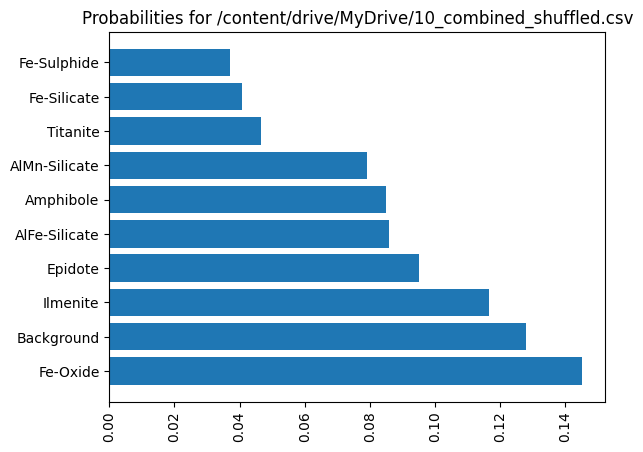

In [ ]:
name = "/content/drive/MyDrive/10_combined_shuffled.csv"

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import warnings
from sklearn.exceptions import UndefinedMetricWarning
import matplotlib.pyplot as plt
import pandas as pd

count = 0

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
count = 0



# Read the current CSV file
df = pd.read_csv(name)
df = df.fillna(0)
print(df["Mineral Phase"].value_counts())
df["Mineral Phase"] = df["Mineral Phase"].astype(str)
n_col = len(df.columns)
df = df.drop(df.iloc[:, 2800:(n_col-2)], axis=1)
df = df.drop(df.iloc[:, :126], axis=1)
X_test = df.iloc[:,:-1]
y_test = df.iloc[:,-1].astype(str)
y_pred = random_forest.predict(X_test)
y_prob = random_forest.predict_proba(X_test)
avg_probabilities = y_prob.mean(axis=0)
class_counts = y_test.value_counts()
total_samples = len(y_test)
avg_probabilities_dict = {class_: avg_probabilities[i] for i, class_ in enumerate(random_forest.classes_)}
sorted_probs = dict(sorted(avg_probabilities_dict.items(), key=lambda item: item[1], reverse=True)[:10])
# Debugging: Print out the unique classes in y_test and unique_classes
actual_unique_classes = np.unique(y_test)
unique_classes = y_test.unique().tolist()
report = classification_report(y_test, y_pred, zero_division = 1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division = 1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division = 1)
f1 = f1_score(y_test, y_pred, average='weighted',zero_division = 1)
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)
print(f"The classification report for {name} ({count}):\n{report}")
avg_accuracy = sum(accuracy_list) / len(accuracy_list)
avg_precision = sum(precision_list) / len(precision_list)
avg_recall = sum(recall_list) / len(recall_list)
avg_f1 = sum(f1_list) / len(f1_list)
print(avg_accuracy,avg_precision,avg_recall,avg_f1)
plt.barh(list(sorted_probs.keys()), list(sorted_probs.values()))
plt.title(f"Probabilities for {name}")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()
